M. Amintoosi
## برنامه خوشه‌بندی تعدادی تصاویر بر اساس بردار میاگین آنها

اگر در گوکل کولب اجرا می‌کنید، دو دستور زیر را از حالت توضیح خارج کنید

In [1]:
# !git clone https://github.com/fum-cs/fds.git
# %cd fds/code

<div dir="rtl">
با درخواست زیر از چت جی پی تی خواستم که برنامه را بنویسد:

تعدادی عکس رنگی jpg در یک پوشه دارم. تکه برنامه پایتونی میخواهم که میانگین شدت رنگ پیکسلهای هر تصویر را به دست آورده، این بردارهای میانگین را به عنوان نماینده تصاویر خوشه بندی کرده و  سپس تصاویر هر خوشه را نشان دهد

اینم حاصلش با مقداری ویرایش:
</div>

<div dir="rtl">
•  ابتدا، تمام تصاویر jpg را از یک پوشه مشخص خوانده و به آرایه های NumPy تبدیل میکند.

•  سپس، میانگین شدت رنگ پیکسلهای هر تصویر را به دست میآورد و یک بردار سه بعدی از آنها میسازد.

•  سپس، از الگوریتم k-means از کتابخانه scikit-learn برای خوشه بندی بردارهای میانگین استفاده میکند. شما میتوانید تعداد خوشه ها را به دلخواه خود تنظیم کنید.

•  در نهایت، تصاویر هر خوشه را با استفاده از کتابخانه matplotlib نمایش میدهد.
</div>

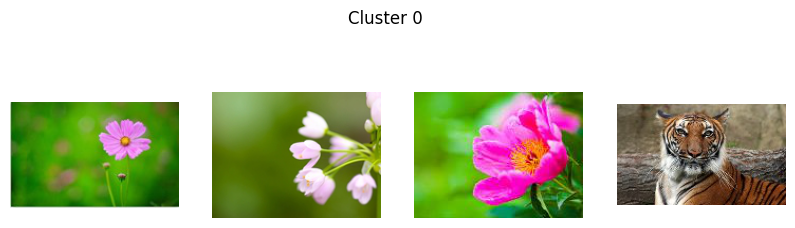

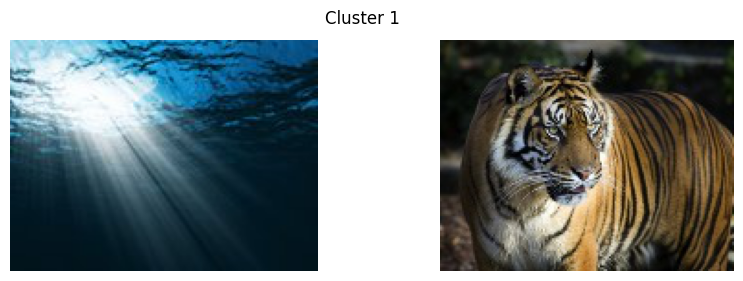

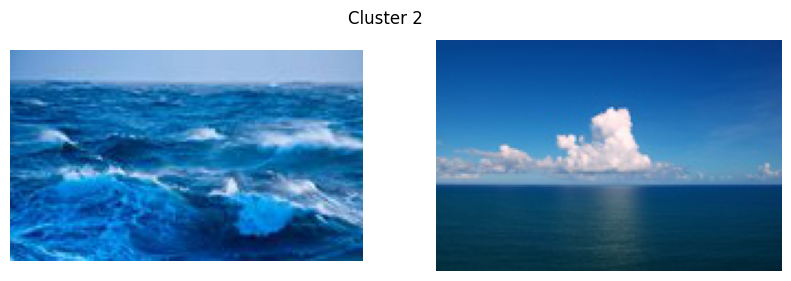

In [2]:
# وارد کردن کتابخانه های مورد نیاز
import os
import numpy as np
from PIL import Image
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from skimage.color import rgb2hsv
from skimage.color import rgb2lab

# تعریف پوشه ای که تصاویر jpg در آن قرار دارند
folder = "images"

# خواندن تصاویر و تبدیل آنها به آرایه های NumPy
images = []
for filename in os.listdir(folder):
    if filename.endswith(".jpg"):
        img = Image.open(os.path.join(folder, filename))
        img = np.array(img)
        images.append(img)

# تعداد تصاویر
n = len(images)

# محاسبه میانگین شدت رنگ پیکسلهای هر تصویر
means = []
for img in images:
    # img = rgb2hsv(img)
    # img = rgb2lab(img)
    mean = np.mean(img, axis=(0, 1)) # میانگین بر اساس محورهای ارتفاع و عرض
    means.append(mean)

# تبدیل لیست میانگینها به آرایه NumPy
means = np.array(means)

# خوشهبندی بردارهای میانگین با الگوریتم k-means
k = 3 # تعداد خوشه ها - شما میتوانید این را تغییر دهید
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(means)
labels = kmeans.labels_ # برچسب خوشه ها

# نمایش تصاویر هر خوشه
for i in range(k):
    # انتخاب تصاویری که به خوشه i تعلق دارند
    cluster = [images[j] for j in range(n) if labels[j] == i]
    # تعداد تصاویر در خوشه i
    m = len(cluster)
    # تعیین اندازه شکل برای نمایش تصاویر
    plt.figure(figsize=(10, 3))
    # حلقه برای نمایش تصاویر
    for j in range(m):
        # ایجاد یک زیر شکل برای هر تصویر
        plt.subplot(1, m, j + 1)
        # حذف محورها
        plt.axis("off")
        # نمایش تصویر
        plt.imshow(cluster[j])
    # نمایش عنوان شکل
    plt.suptitle(f"Cluster {i}")
    # نمایش شکل
    plt.show()